In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import keras
from keras.utils import plot_model
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


In [43]:
df = pd.read_csv('../../data.csv', sep=',', index_col='id')
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)
df['k'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20 + [0.3] * 20 + [0.3] * 20


In [44]:
subject_courses = {
    1: ['calculus', 'algebra', 'discrete'],
    2: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics'],
    3: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics', 
        'prob_and_stat', 'pde', 'functional'],
    4: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics', 
        'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
}

years = [13, 14, 15, 16, 17]
train_data = []


for index, row in df.iterrows():
    for i in range(1, 4):
        # [1] -> 2, [1,2] -> 3, [1, 2, 3] -> 4
        
        current_subjects = row[subject_courses[i]]
        if current_subjects.isnull().values.any():
            continue
        
        previous_mean = current_subjects.mean()
        next_subjects = row[subject_courses[i+1]]
        
        if next_subjects.isnull().values.any():
            continue
            
        next_mean = next_subjects.mean()

        train_data.append(dict(
            ege=row['ege'],
            k=row['k'],
            course=i,
            prev_mean=previous_mean,
            next_mean=next_mean,
            year=row['year']
        ))

train_df = pd.DataFrame(train_data)
# train_df['round'] = np.rint(train_df['mean'].values)
# train_df[['prev_mean', 'next_mean']]
x = train_df[['ege', 'k', 'course', 'prev_mean']].values
y = train_df['next_mean'].values


In [104]:
max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=1))
model.add(LSTM(128))
model.add(Dense(1, activation='relu'))

model.compile(loss='logcosh',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [105]:
# one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
history = model.fit(x, y, epochs=300, batch_size=40, verbose=0, shuffle=False)


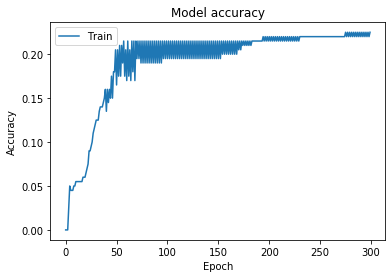

In [106]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

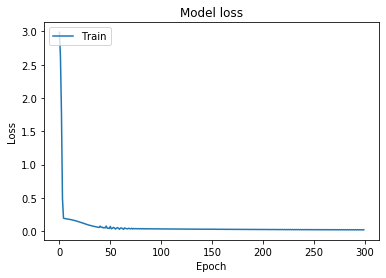

In [107]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### Прогнозирование для 16 года на 2 курс


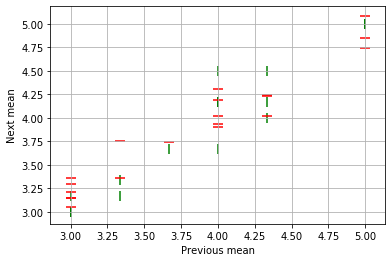

In [111]:
df_16 = train_df[train_df['year'] == 16][['ege', 'k', 'prev_mean', 'course', 'next_mean']]
x_train = df_16[['ege', 'k', 'course', 'prev_mean']].values
y_train = df_16['next_mean'].values

y_predict = model.predict(x_train)
# y_predict = list(map(lambda y : y.argmax()+3, y_predict))

marker_size = [100 for i in range(len(x))]
plt.scatter(x_train[:, 3], y_train, marker='|', color='green', s=marker_size)
plt.scatter(x_train[:, 3], y_predict, marker='_', color='red', s=marker_size)

plt.grid()
plt.xticks(np.arange(3, 5.25, 0.25))
plt.yticks(np.arange(3, 5.25, 0.25))
plt.xlabel('Previous mean')
plt.ylabel('Next mean');


#### Прогнозирование для 15 года на 4 курс


/home/roman/PycharmProjects/Example/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


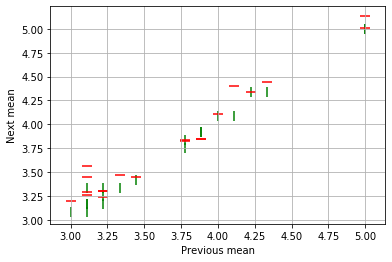

In [110]:
df_15 = train_df[train_df['year'] == 15][train_df['course']==3][['ege', 'k', 'prev_mean', 'course', 'next_mean']]
x_train = df_15[['ege', 'k', 'course', 'prev_mean']].values
y_train = df_15['next_mean'].values

y_predict = model.predict(x_train)
# y_predict = list(map(lambda y : y.argmax()+3, y_predict))

marker_size = [100 for i in range(len(x))]
plt.scatter(x_train[:, 3], y_train, marker='|', color='green', s=marker_size)
plt.scatter(x_train[:, 3], y_predict, marker='_', color='red', s=marker_size)

plt.grid()
plt.xticks(np.arange(3, 5.25, 0.25))
plt.yticks(np.arange(3, 5.25, 0.25))
plt.xlabel('Previous mean')
plt.ylabel('Next mean');